In [147]:
#import dependencies
import pandas as pd

In [148]:
# read in csv
df= pd.read_csv('resources/US-Monthly-GDP-History-Data.csv')
df

,Unnamed: 0,Monthly Nominal GDP Index,Monthly Real GDP Index,Unnamed: 3,Unnamed: 4
0,1992 - Jan,6315.718,10177.808,NaN,NaN
1,1992 - Feb,6356.508,10222.919,NaN,NaN
2,1992 - Mar,6417.080,10307.964,NaN,NaN
3,1992 - Apr,6443.260,10314.310,NaN,NaN
4,1992 - May,6433.800,10293.473,NaN,NaN
...,...,...,...,...,...
398,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN
401,NaN,NaN,NaN,NaN,NaN


In [149]:
# rename date column to 'Date'
# use .info() to learn more about the dataframe
df = df.rename(columns= {'Unnamed: 0': 'Date'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       391 non-null    object 
 1   Monthly Nominal GDP Index  391 non-null    float64
 2   Monthly Real GDP Index     391 non-null    float64
 3   Unnamed: 3                 0 non-null      float64
 4   Unnamed: 4                 0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [150]:
# drop empty columns and rows
df = df[['Date', 'Monthly Nominal GDP Index', 'Monthly Real GDP Index']]
df = df.dropna()
display(df.head())
display(df.tail(100))

,Date,Monthly Nominal GDP Index,Monthly Real GDP Index
0,1992 - Jan,6315.718,10177.808
1,1992 - Feb,6356.508,10222.919
2,1992 - Mar,6417.080,10307.964
3,1992 - Apr,6443.260,10314.310
4,1992 - May,6433.800,10293.473


,Date,Monthly Nominal GDP Index,Monthly Real GDP Index
291,2016 - Apr,18704.041,19091.527
292,2016 - May,18687.668,19042.327
293,2016 - Jun,18743.397,19054.522
294,2016 - Jul,18778.439,19098.776
295,2016 - Aug,18889.881,19204.273
...,...,...,...
386,2024 - Mar,28374.270,22767.625
387,2024 - Apr,28553.963,22853.520
388,2024 - May,28687.910,22960.986
389,2024 - June,28717.658,22967.554


In [151]:
# create a dict and store the month abbrev. with their corresponding number
months= {'Jan': "01", 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 
        'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10',
         'Nov': '11', 'Dec': '12'}
# for each month abbrev. in 'Date' column, replace it with corresponding number

df['Date'] = df['Date'].replace(months, regex=True)

In [158]:
# convert to date to datetime
# set index to 'Date'
# take years only up until 2015

try:
    df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
except Exception as e:
    print(e)

df = df.dropna(subset=['Date'])
gdp_df= df.set_index('Date')

gdp_df = gdp_df.loc['1992':'2015']
gdp_df

,Monthly Nominal GDP Index,Monthly Real GDP Index
Date,,
1992-01-01,6315.718,10177.808
1992-02-01,6356.508,10222.919
1992-03-01,6417.080,10307.964
1992-04-01,6443.260,10314.310
1992-05-01,6433.800,10293.473
...,...,...
2015-08-01,18379.862,18831.586
2015-09-01,18456.886,18920.520
2015-10-01,18469.416,18917.436


In [162]:
gdp_df['Year'] = gdp_df.index.year
gdp_df['Month'] = gdp_df.index.month
gdp_df

,Monthly Nominal GDP Index,Monthly Real GDP Index,Year,Month
Date,,,,
1992-01-01,6315.718,10177.808,1992,1
1992-02-01,6356.508,10222.919,1992,2
1992-03-01,6417.080,10307.964,1992,3
1992-04-01,6443.260,10314.310,1992,4
1992-05-01,6433.800,10293.473,1992,5
...,...,...,...,...
2015-08-01,18379.862,18831.586,2015,8
2015-09-01,18456.886,18920.520,2015,9
2015-10-01,18469.416,18917.436,2015,10


<Axes: xlabel='Date'>

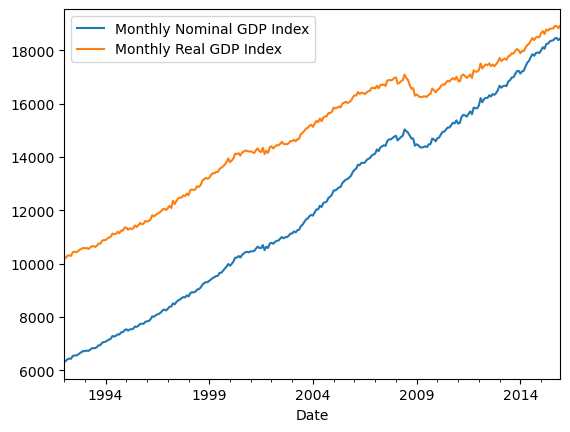

In [163]:
gdp_df[['Monthly Nominal GDP Index','Monthly Real GDP Index']]. plot()